<a href="https://colab.research.google.com/github/masoom-alam/FMML_2024/blob/main/FMML_M2L1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import requests
url = "https://raw.githubusercontent.com/SP9144/FMML_Data/main/Automobile_data.csv"
response = requests.get(url)

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
from io import StringIO
import matplotlib.pyplot as plt

In [3]:
# Loading the dataset
data = StringIO(response.text)
data = pd.read_csv(data)
print("Number of data points =", len(data))
data.head()

Number of data points = 205


,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.4,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.4,8.0,115,5500,18,22,17450


In [4]:
# Removing rows which have missing values

data.replace("?", np.nan, inplace = True)
data = data.dropna()
print(len(data))

159


In [5]:
# Dividing the dataset into features (X) and the target variable (y)

X = data.drop("price", axis = 1)
y = pd.to_numeric(data["price"])

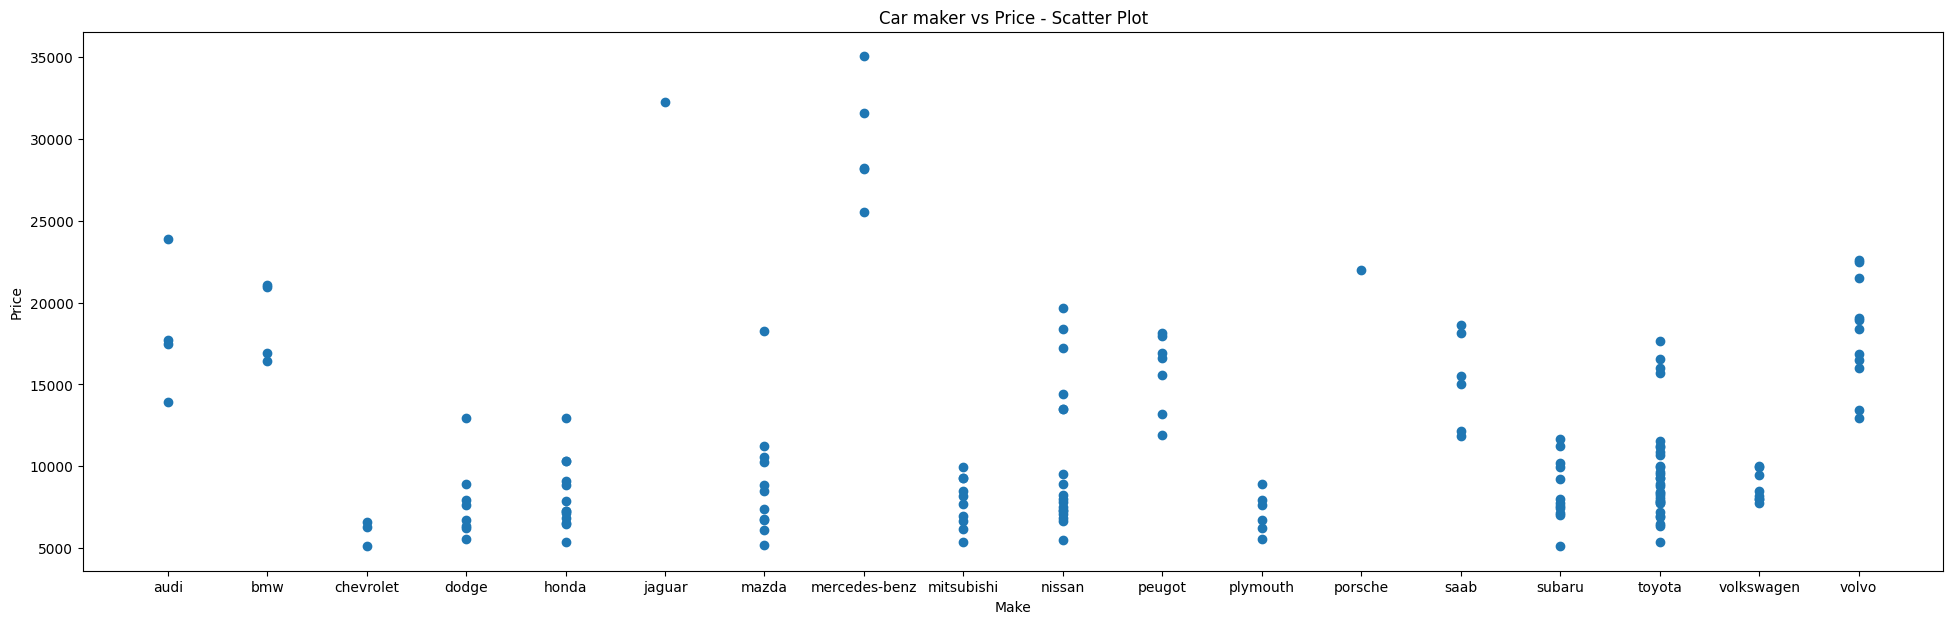

In [6]:
plt.figure(figsize = (24, 7))
plt.scatter(X["make"], y)
plt.xlabel('Make')
plt.ylabel('Price')
plt.title('Car maker vs Price - Scatter Plot')
plt.show()

<ipython-input-7-0447ba8df549>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=X["make"],y=y, palette="Set3").set_title('Car Manufacturer vs Price - Box Plot')


Text(0.5, 1.0, 'Car Manufacturer vs Price - Box Plot')

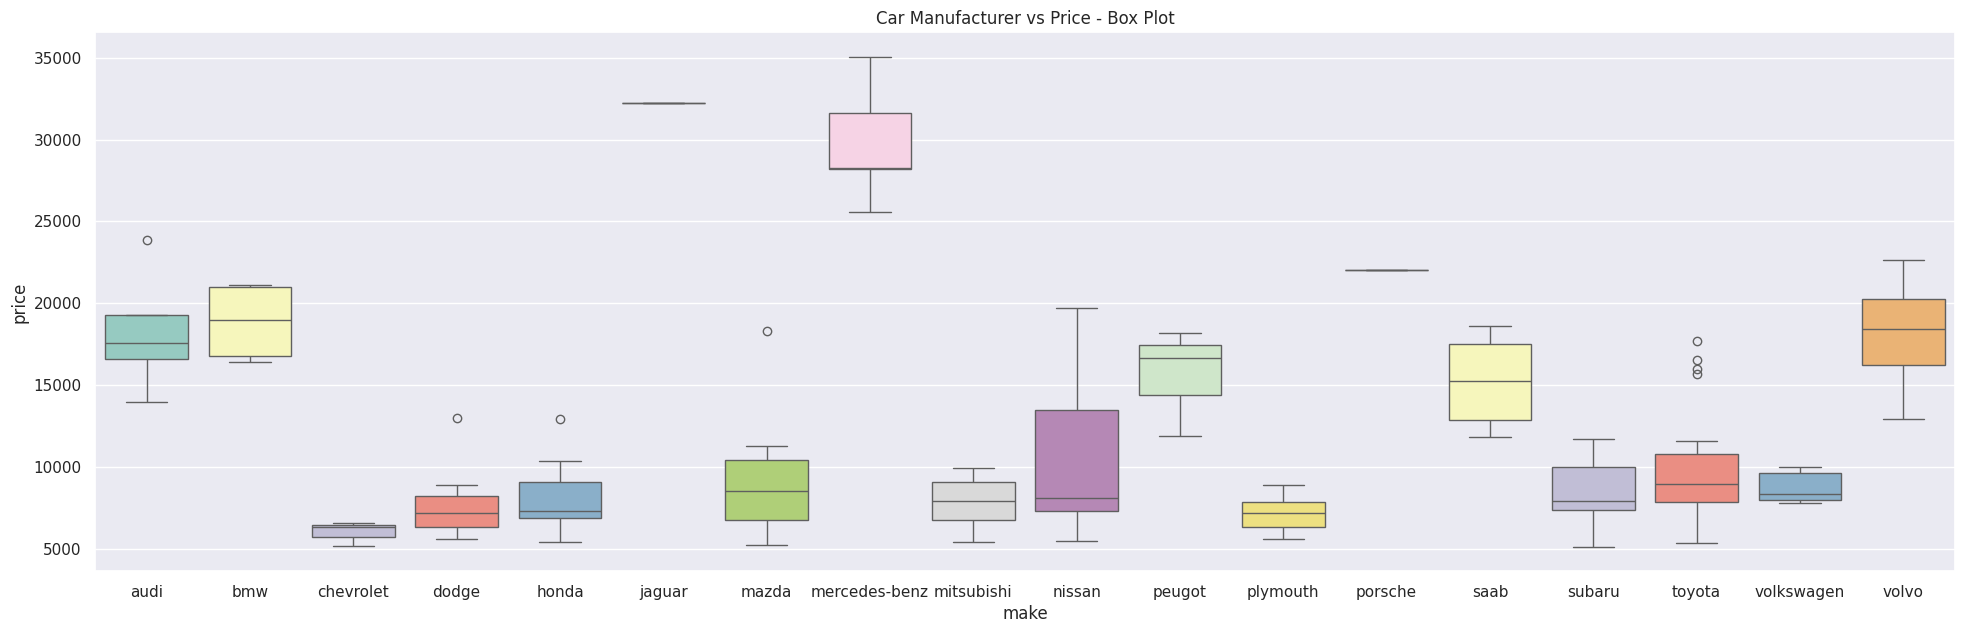

In [7]:
sns.set(rc={'figure.figsize':(24,7)})
sns.boxplot(x=X["make"],y=y, palette="Set3").set_title('Car Manufacturer vs Price - Box Plot')

<ipython-input-8-10344be32235>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x=X["make"],y=y, palette="Set3").set_title('Car maker vs Price - Violin Plot')


Text(0.5, 1.0, 'Car maker vs Price - Violin Plot')

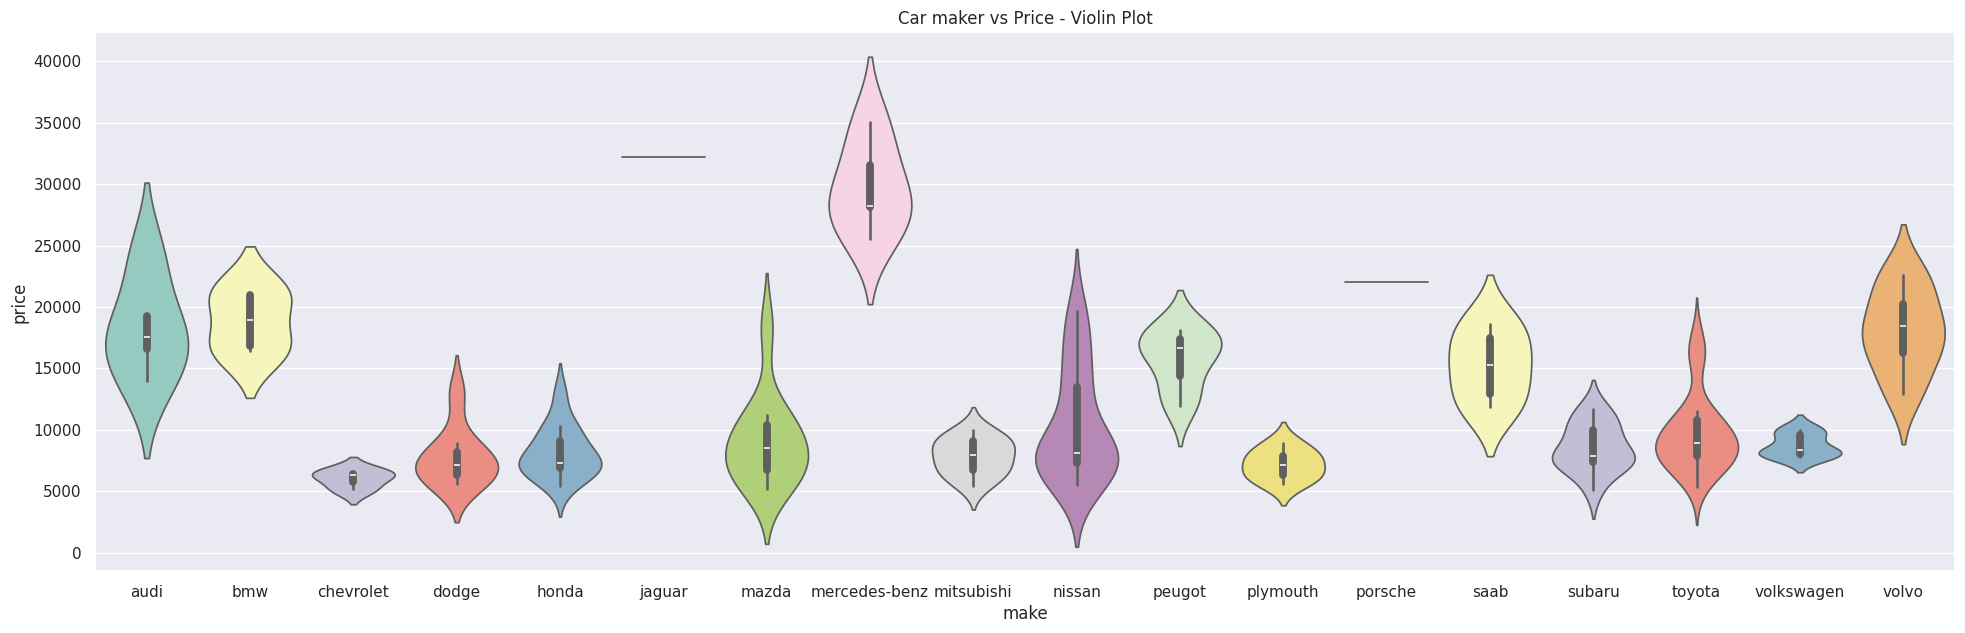

In [8]:
sns.violinplot(x=X["make"],y=y, palette="Set3").set_title('Car maker vs Price - Violin Plot')

Text(0.5, 1.0, 'Car maker vs Price Swarm Plot')

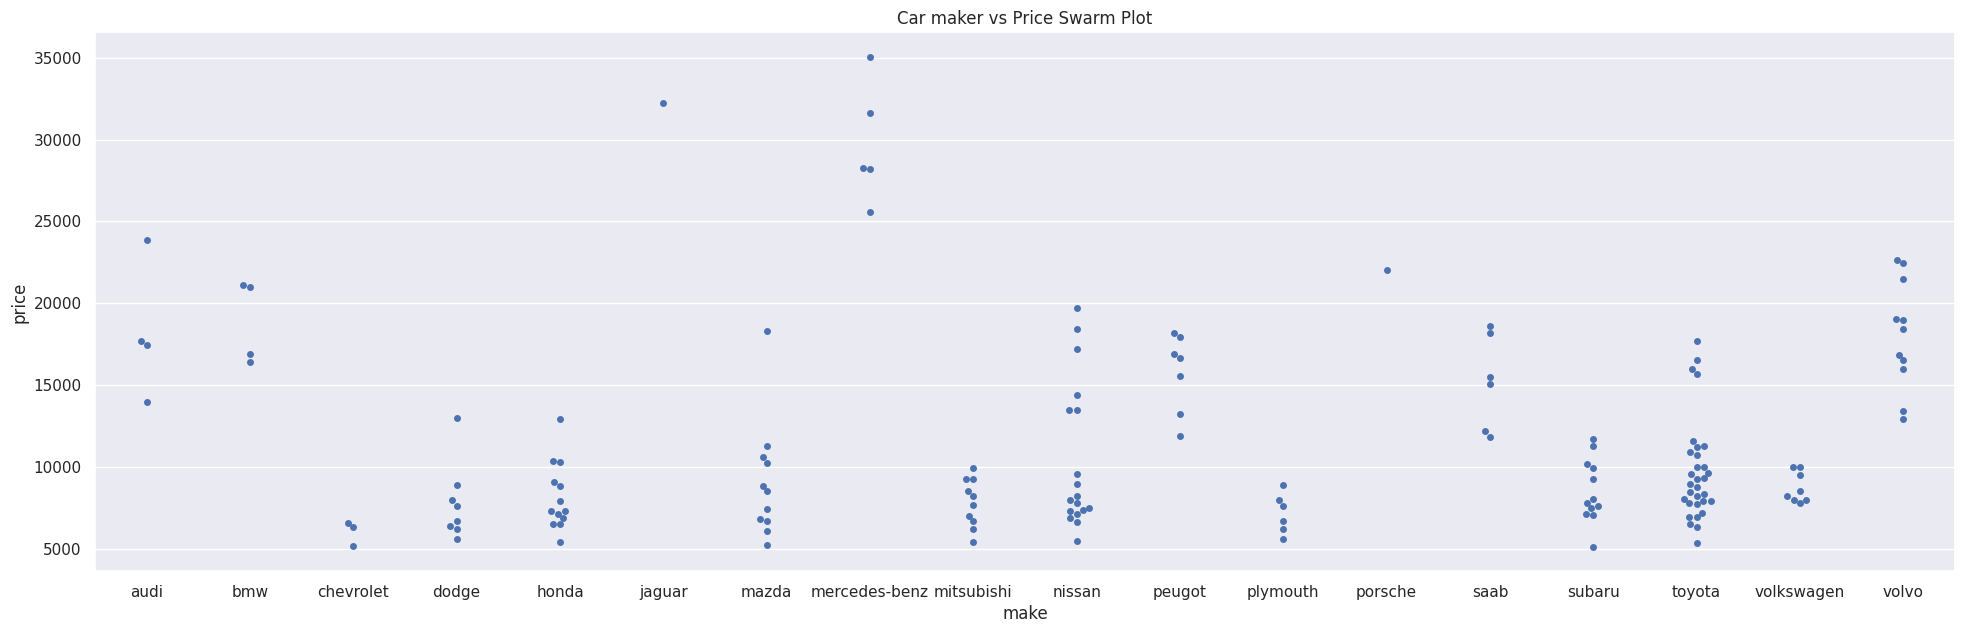

In [9]:
sns.swarmplot(x=X["make"],y=y).set_title('Car maker vs Price Swarm Plot')

<ipython-input-10-c71fe76854fb>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=X["make"],y=pd.to_numeric(X["horsepower"]), palette="Set3").set_title('Car maker vs Horsepower Box Plot')


Text(0.5, 1.0, 'Car maker vs Horsepower Box Plot')

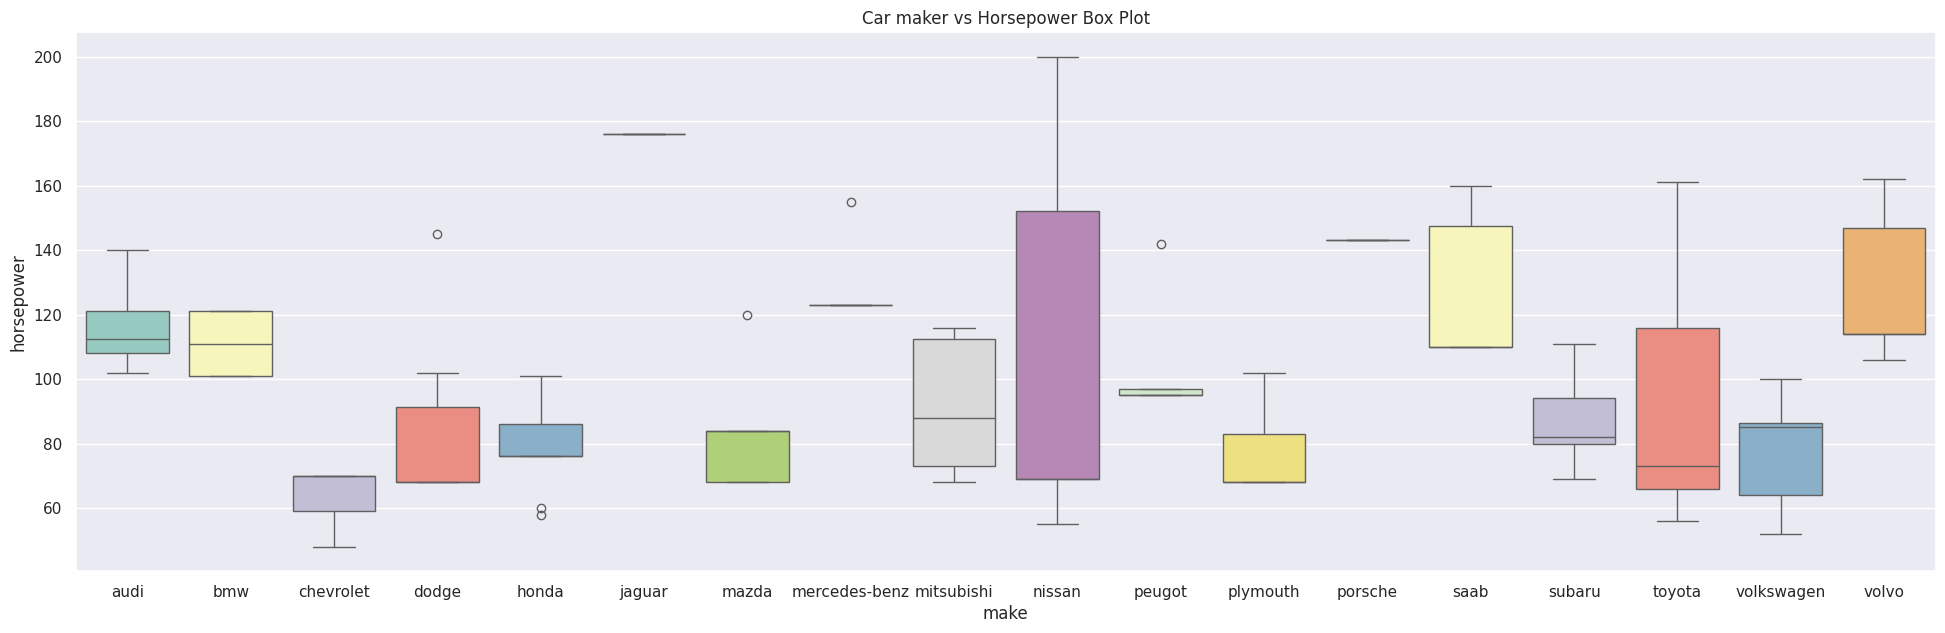

In [10]:
sns.boxplot(x=X["make"],y=pd.to_numeric(X["horsepower"]), palette="Set3").set_title('Car maker vs Horsepower Box Plot')

<Axes: xlabel='horsepower', ylabel='price'>

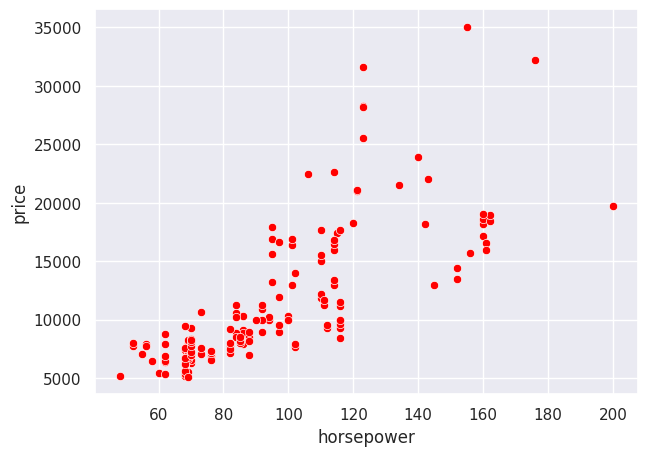

In [11]:
sns.set(rc={'figure.figsize':(7,5)})
sns.scatterplot(x=pd.to_numeric(X["horsepower"]), y = y, color = "red")

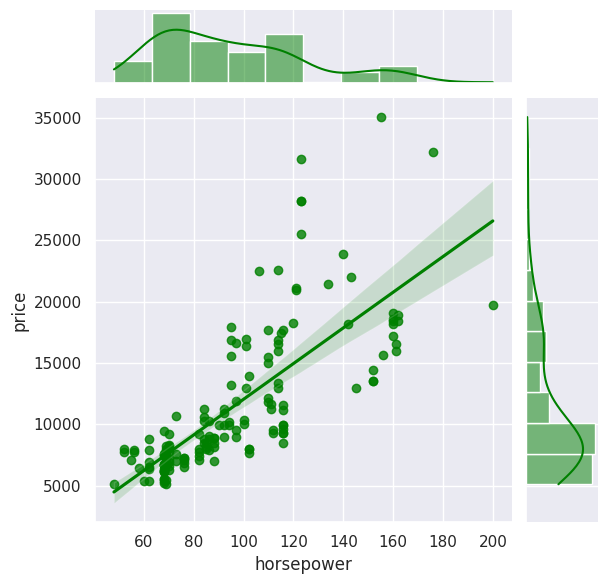

In [12]:
sns.jointplot(x=pd.to_numeric(X["horsepower"]), y = y, kind="reg", color = 'green')

Exercise: Plot the jointplot for a feature which has negative correlation with the target variable "price".


Features with negative correlation to price:
['symboling', 'peak-rpm', 'city-mpg', 'highway-mpg']


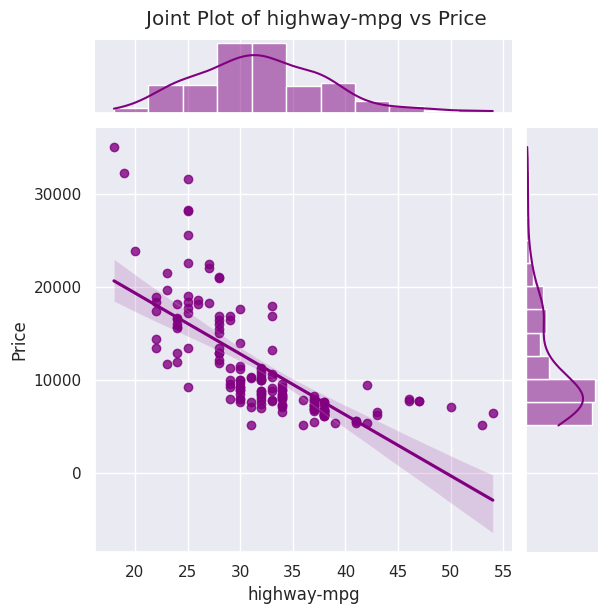

In [16]:
import requests
import pandas as pd
import numpy as np
from io import StringIO
import seaborn as sns
import matplotlib.pyplot as plt

# Fetching the dataset
url = "https://raw.githubusercontent.com/SP9144/FMML_Data/main/Automobile_data.csv"
response = requests.get(url)

# Loading the dataset
data = StringIO(response.text)
data = pd.read_csv(data)

# Replacing '?' with NaN and removing rows with missing values
data.replace("?", np.nan, inplace=True)
data = data.dropna()

# Convert 'price' to numeric
data["price"] = pd.to_numeric(data["price"])

# Selecting numeric features
numeric_features = [
    'symboling', 'wheel-base', 'length', 'width', 'height',
    'curb-weight', 'engine-size', 'bore', 'stroke',
    'compression-ratio', 'horsepower', 'peak-rpm',
    'city-mpg', 'highway-mpg'
]

# Calculate correlations with price
correlations = data[numeric_features + ['price']].corr()

# Identify features with negative correlation to price
negative_corr_features = correlations[correlations['price'] < 0]['price'].index.tolist()

# Display negative correlations
print("Features with negative correlation to price:")
print(negative_corr_features)

# Choose one of the features with negative correlation
# For this example, let's choose 'highway-mpg'
selected_feature = 'highway-mpg'

# Ensure the selected feature is numeric
data[selected_feature] = pd.to_numeric(data[selected_feature], errors='coerce')

# Creating the joint plot for the selected feature
sns.jointplot(x=data[selected_feature], y=data["price"], kind="reg", color='purple')
plt.xlabel(selected_feature)
plt.ylabel('Price')
plt.suptitle(f'Joint Plot of {selected_feature} vs Price', y=1.02)  # Adjust title position
plt.show()


Question: Interpret the plot below. List all the interpretations point by point using the plot below.

Some pointers:
1) Think about the maximum/minimum values for each body-type, which body-type is the "costliest" ?
2) Do you think maximum/minimum values are a clear indication of which body-type is costliest, or does the interpretation improve by also taking the interquartile range into consideration?
3) Do you think the body-style of a car can be a good predictor for its price?

#answers

Maximum and Minimum Values:
Identify which body type has the highest maximum price and the lowest minimum price.
Costliest Body Type:
The body type with the highest maximum price is the "costliest."
Interquartile Range (IQR):
Consider the IQR to understand price variability. A large IQR indicates diverse models/features within that body type.
Maximum and minimum values alone may not fully represent price distribution.
Predictive Value of Body Style:
If body types have distinct price clusters with minimal overlap, body style can be a good predictor of price.
Significant overlap may suggest that other factors influence price.

<ipython-input-17-5739ed01973b>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=X["body-style"],y=y, palette="Set3").set_title('Body style vs Price Box Plot')


Text(0.5, 1.0, 'Body style vs Price Box Plot')

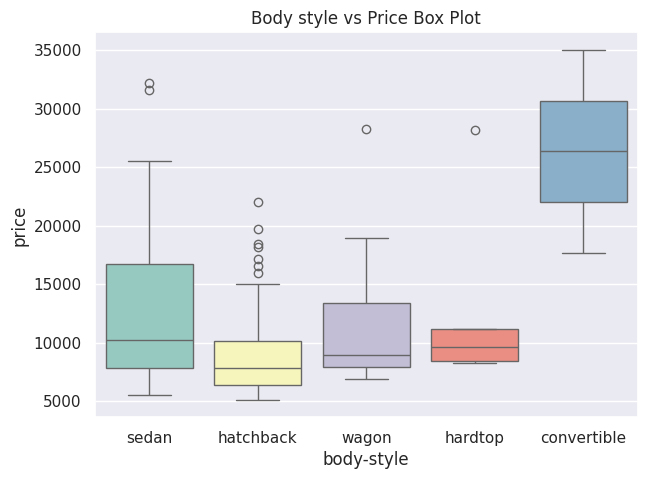

In [17]:
sns.boxplot(x=X["body-style"],y=y, palette="Set3").set_title('Body style vs Price Box Plot')

#EXERCISE

<ipython-input-18-52fca4e83a4e>:36: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=data['body-style'], y=data['price'], ax=axs[1], palette='Set3')


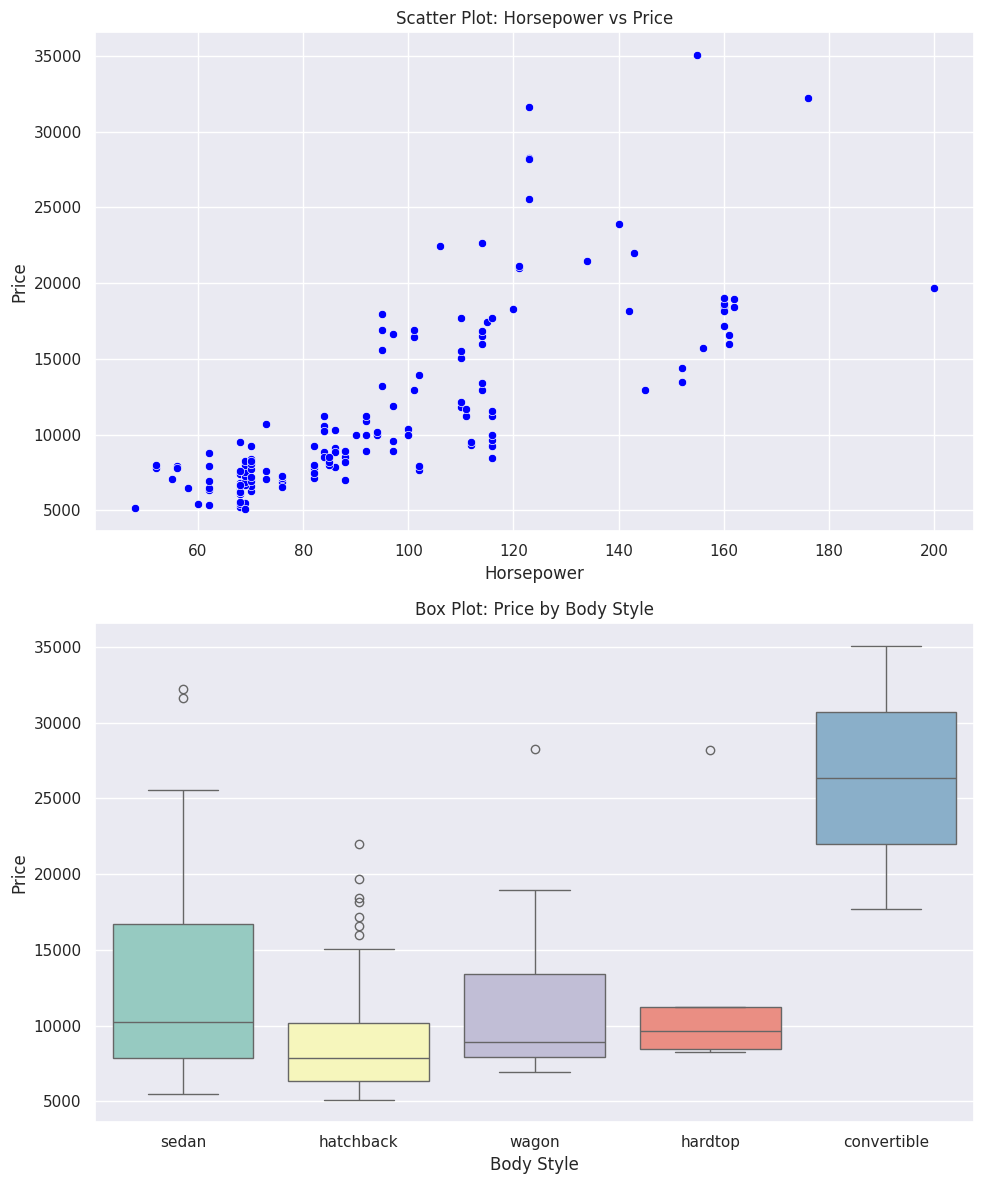

In [18]:
import requests
import pandas as pd
import numpy as np
from io import StringIO
import seaborn as sns
import matplotlib.pyplot as plt

# Fetching the dataset
url = "https://raw.githubusercontent.com/SP9144/FMML_Data/main/Automobile_data.csv"
response = requests.get(url)

# Loading the dataset
data = StringIO(response.text)
data = pd.read_csv(data)

# Replacing '?' with NaN and removing rows with missing values
data.replace("?", np.nan, inplace=True)
data = data.dropna()

# Convert 'price' to numeric
data["price"] = pd.to_numeric(data["price"])

# Ensure horsepower is numeric
data["horsepower"] = pd.to_numeric(data["horsepower"], errors='coerce')

# Set up the figure and axes for subplots
fig, axs = plt.subplots(2, 1, figsize=(10, 12))

# Scatter Plot (Horsepower vs Price)
sns.scatterplot(x=data['horsepower'], y=data['price'], ax=axs[0], color='blue')
axs[0].set_title('Scatter Plot: Horsepower vs Price')
axs[0].set_xlabel('Horsepower')
axs[0].set_ylabel('Price')

# Box Plot (Price by Body Type)
sns.boxplot(x=data['body-style'], y=data['price'], ax=axs[1], palette='Set3')
axs[1].set_title('Box Plot: Price by Body Style')
axs[1].set_xlabel('Body Style')
axs[1].set_ylabel('Price')

# Adjust layout
plt.tight_layout()
plt.show()


   symboling  wheel-base  length  width  height  curb-weight  engine-size  \
0          3        88.6   168.8   64.1    48.8         2548          130   
1          3        88.6   168.8   64.1    48.8         2548          130   
2          1        94.5   171.2   65.5    52.4         2823          152   
3          2        99.8   176.6   66.2    54.3         2337          109   
4          2        99.4   176.6   66.4    54.3         2824          136   

   bore  stroke  compression-ratio  horsepower  peak-rpm  city-mpg  \
0  3.47    2.68                9.0       111.0    5000.0        21   
1  3.47    2.68                9.0       111.0    5000.0        21   
2  2.68    3.47                9.0       154.0    5000.0        19   
3  3.19    3.40               10.0       102.0    5500.0        24   
4  3.19    3.40                8.0       115.0    5500.0        18   

   highway-mpg    price  
0           27  13495.0  
1           27  16500.0  
2           26  16500.0  
3           

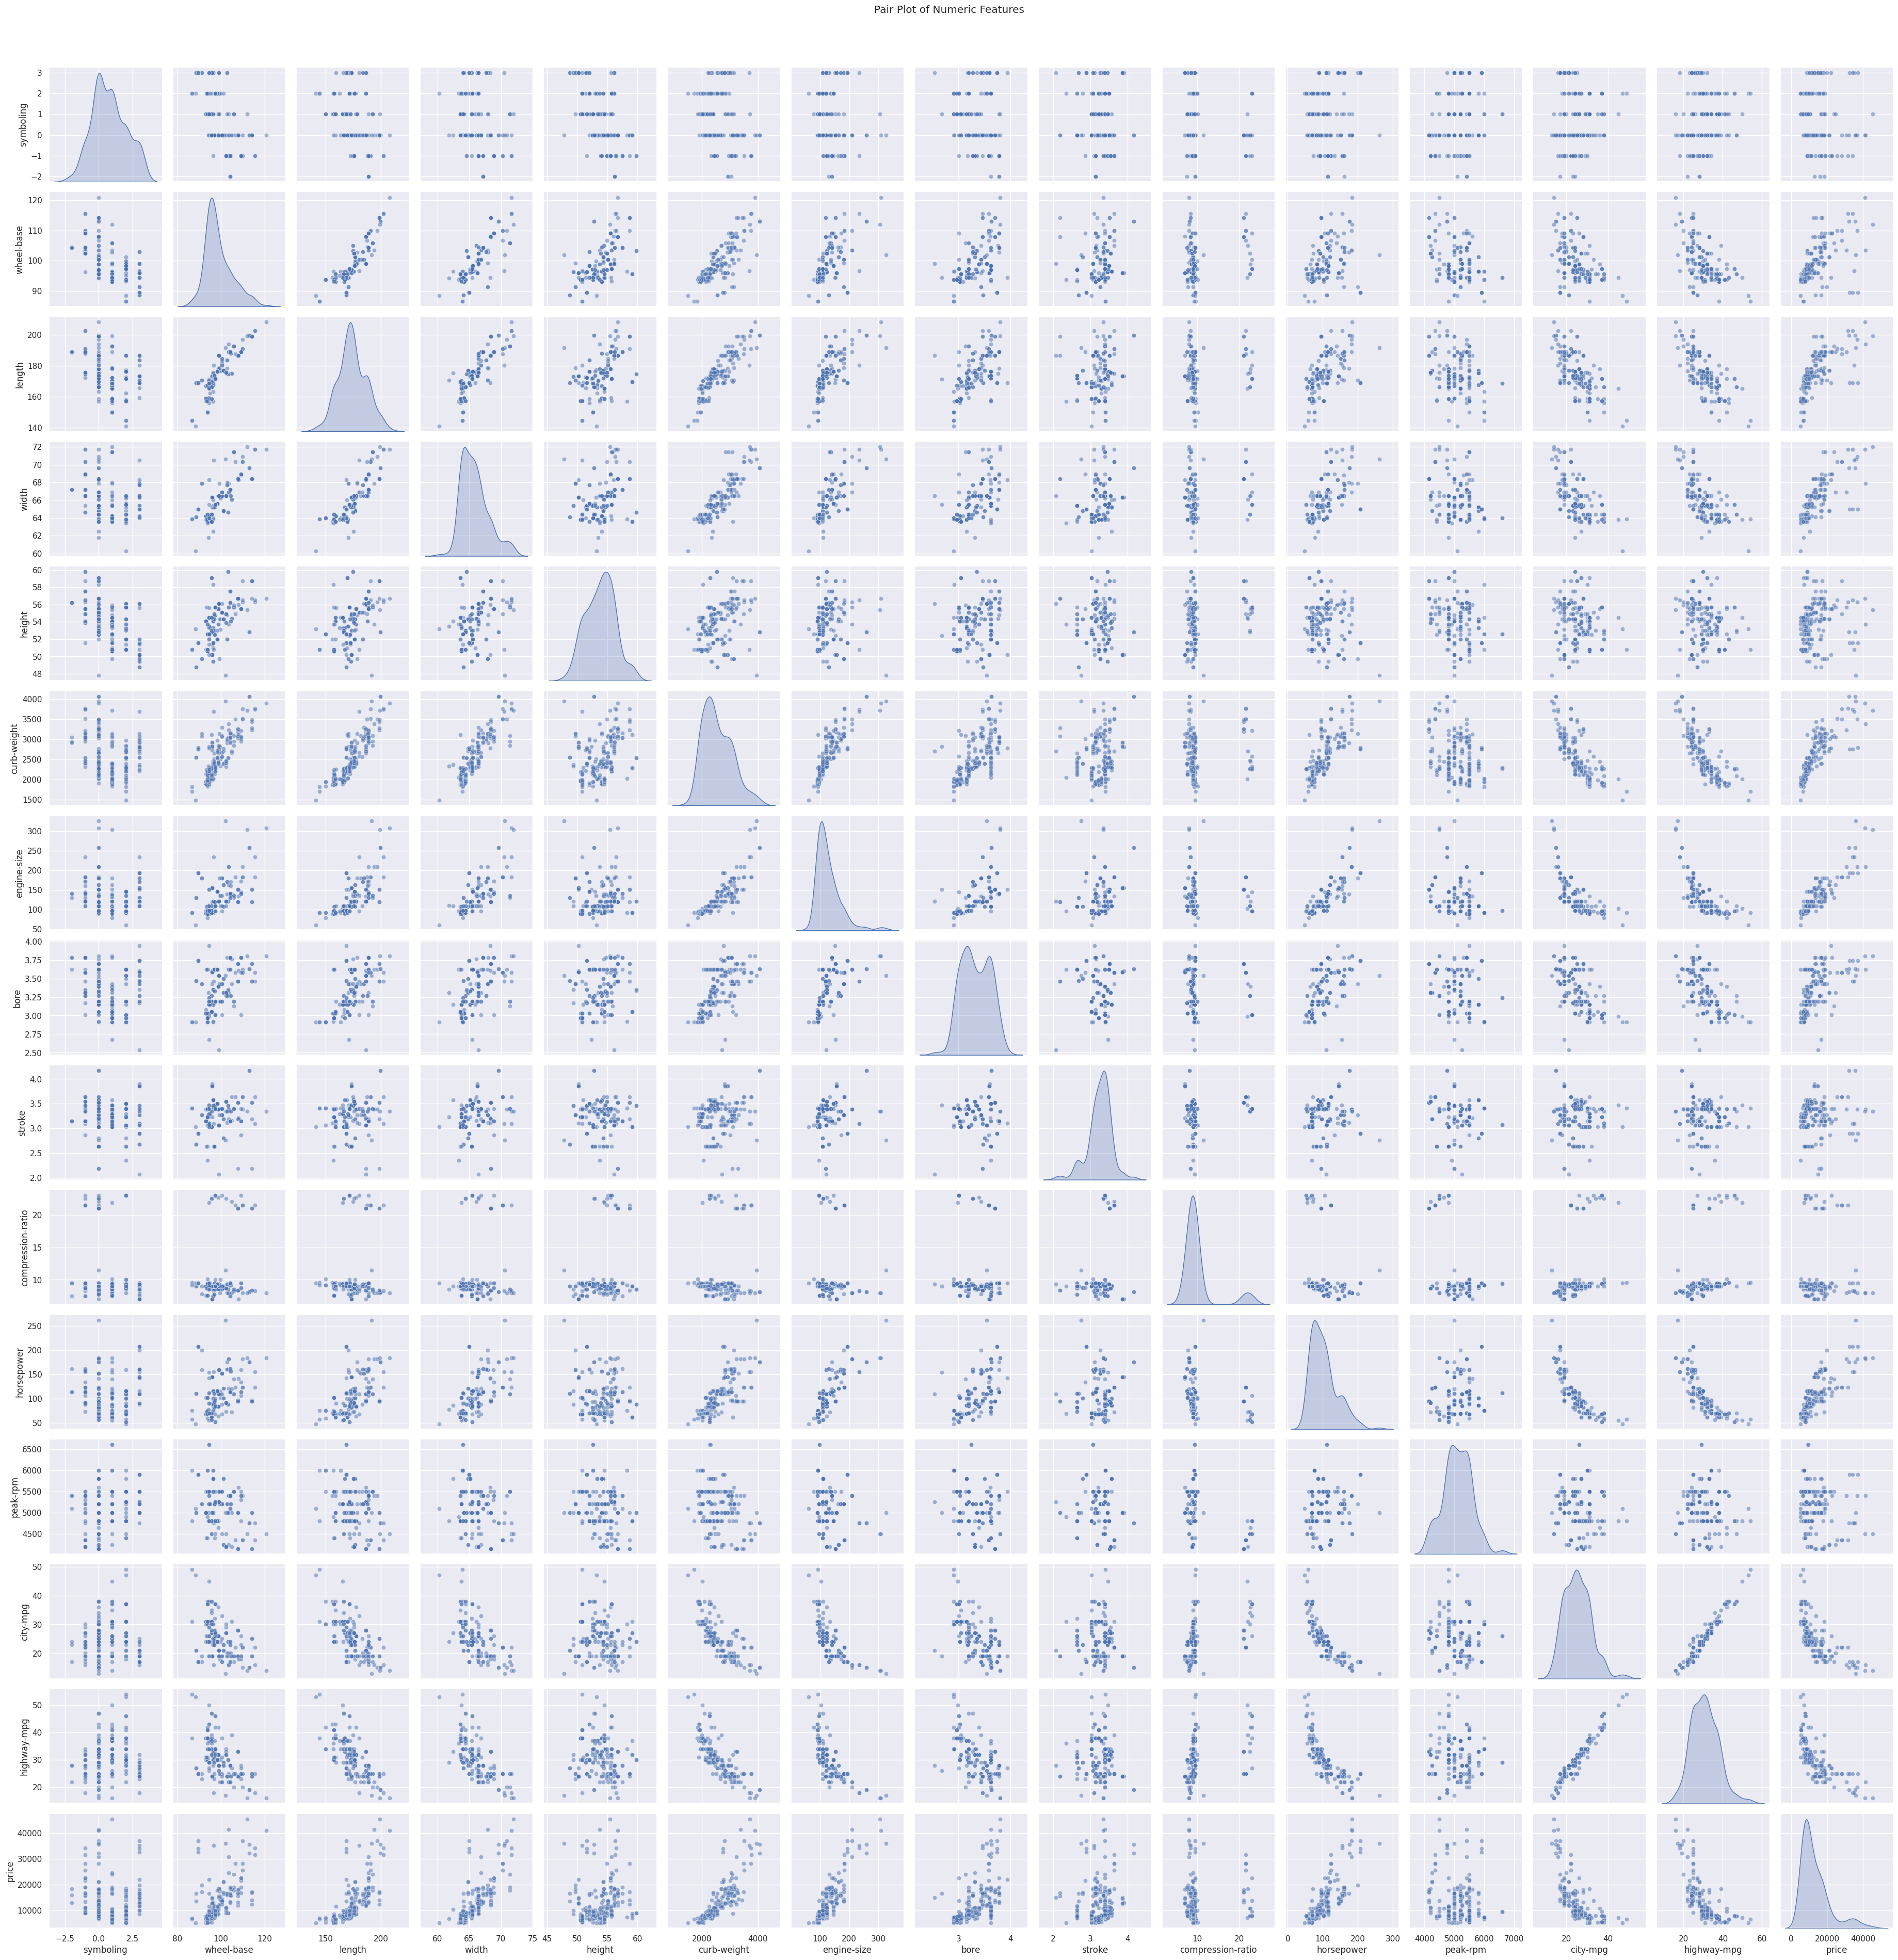

In [22]:
import requests
import pandas as pd
import numpy as np
from io import StringIO
import seaborn as sns
import matplotlib.pyplot as plt

# Fetching the dataset
url = "https://raw.githubusercontent.com/SP9144/FMML_Data/main/Automobile_data.csv"
response = requests.get(url)

# Loading the dataset
data = StringIO(response.text)
data = pd.read_csv(data)

# Replacing '?' with NaN and removing rows with missing values
data.replace("?", np.nan, inplace=True)

# Convert 'price' to numeric
data["price"] = pd.to_numeric(data["price"], errors='coerce')

# Define the numeric features to include in the pair plot
numeric_features = [
    'symboling', 'wheel-base', 'length', 'width', 'height',
    'curb-weight', 'engine-size', 'bore', 'stroke',
    'compression-ratio', 'horsepower', 'peak-rpm',
    'city-mpg', 'highway-mpg', 'price'
]

# Convert the selected numeric features to numeric and handle errors
for feature in numeric_features:
    data[feature] = pd.to_numeric(data[feature], errors='coerce')

# Drop rows that contain NaN values in any of the numeric features
clean_data = data[numeric_features].dropna()

# Check if the data is clean
print(clean_data.head())

# Create a pair plot
sns.pairplot(clean_data, diag_kind='kde', markers='o', plot_kws={'alpha': 0.5})
plt.suptitle('Pair Plot of Numeric Features', y=1.02)  # Adjust title position
plt.show()
